# Scikit-learn 

**Scikit-learn** (http://scikit-learn.org/) is an open-source machine learning library for Python that offers a variety of regression, classification and clustering algorithms.

WE are going to classify ham or spam sms. ITs a binary classification

setup:

use anaconda prompt
> `conda install scikit-learn`

> `pip install -U scikit-learn`

Scikit-learn additionally requires that NumPy and SciPy be installed. For more info visit http://scikit-learn.org/stable/install.html

load data
For this exercise we'll be using the **SMSSpamCollection** dataset from [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) that contains more than 5 thousand SMS phone messages.<br>You can check out the [**sms_readme**](../TextFiles/sms_readme.txt) file for more info.

The file is a [tab-separated-values](https://en.wikipedia.org/wiki/Tab-separated_values) (tsv) file with four columns:
> **label** - every message is labeled as either ***ham*** or ***spam***<br>
> **message** - the message itself<br>
> **length** - the number of characters in each message<br>
> **punct** - the number of punctuation characters in each message

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('smsspamcollection.tsv', sep='\t') # tsv is tab separated, csv is comma separated WOW
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [2]:
len(df)#I dont use the "message" column yet this is just an example for scikit!!!!

5572

## Check for missing values:
Machine learning models NEED  complete data.

In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df['label'].unique() # DETERMINE YOUR UNIQUE LABELS

array(['ham', 'spam'], dtype=object)

In [5]:
df['label'].value_counts()  # DETERMINE NUMBER OF LABELS

ham     4825
spam     747
Name: label, dtype: int64

IMPORTANT!! We see that 4825 out of 5572 messages, or 86.6%, are ham. This means that any machine learning model we create has to perform **better than 86.6%** to beat random chance.

## Visualizing


In [6]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

<font color=green>This dataset is extremely skewed. The mean value is 80.5 and yet the max length is 910. Let's plot this on a logarithmic x-axis.</font>

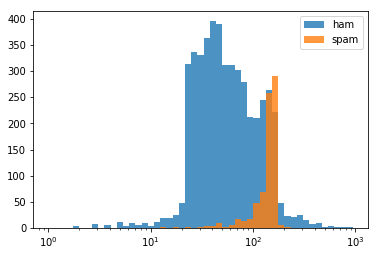

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

It looks like there's a small range of values where a message is more likely to be spam than ham.

Now let's look at the `punct` column:

In [8]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

___
# Split the data into train & test sets:

If we wanted to divide the DataFrame into two smaller sets, we could use
> `train, test = train_test_split(df)`

For our purposes let's also set up our Features (X) and Labels (y). The Label is simple - we're trying to predict the `label` column in our data. For Features we'll use the `length` and `punct` columns. *By convention, **X** is capitalized and **y** is lowercase.*

## Selecting features
There are two ways to build a feature set from the columns we want. If the number of features is small, then we can pass those in directly:
> `X = df[['length','punct']]`

If the number of features is large, then it may be easier to drop the Label and any other unwanted columns:
> `X = df.drop(['label','message'], axis=1)`

These operations make copies of **df**, but do not change the original DataFrame in place. All the original data is preserved.

In [9]:
# Create Feature and Label sets
X = df[['length','punct']]  # note the double set of brackets
y = df['label'] # I dont use the "message" column yet this is just an example for scikit!!!!
type(X)

pandas.core.frame.DataFrame

## Additional train/test/split arguments:
The default test size for `train_test_split` is 30%. Here we'll assign 33% of the data for testing.<br>
Also, we can set a `random_state` seed value to ensure that everyone uses the same "random" training & testing sets.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#80percent training data
#20 percent test data
print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

y_test


Training Data Shape: (4457, 2)
Testing Data Shape:  (1115, 2)


3245     ham
944      ham
1044     ham
2484     ham
812      ham
2973     ham
2991     ham
2942     ham
230      ham
1181     ham
1912     ham
1992     ham
5435     ham
4805     ham
401     spam
1859     ham
1344     ham
2952     ham
501      ham
3337     ham
1945     ham
3142     ham
2422     ham
381      ham
5567    spam
4937     ham
79       ham
5240     ham
2554     ham
5345     ham
        ... 
2641     ham
1407    spam
533      ham
3904     ham
3858     ham
1595     ham
4903    spam
657      ham
4674     ham
3002    spam
5371     ham
2259     ham
898      ham
428      ham
3641     ham
2191     ham
1483     ham
1699    spam
2135     ham
1789     ham
1163    spam
1193     ham
2941    spam
1553     ham
2138     ham
4264     ham
2439     ham
5556     ham
4205     ham
4293     ham
Name: label, Length: 1115, dtype: object

Now we can pass these sets into a series of different training & testing algorithms and compare their results.

___
# Train a Logistic Regression classifier
One of the simplest multi-class classification tools is [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Scikit-learn offers a variety of algorithmic solvers; we'll use [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS). 

In [11]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')
#lr_model = LogisticRegression()  # use shift + tab to see what kind of parameter tuning you can do!!
lr_model.fit(X_train, y_train)

LogisticRegression()

## Test the Accuracy of the Model

In [12]:
from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions)) #below confusion matrix

[[1547   46]
 [ 241    5]]


In [13]:
# You can make the confusion matrix better by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1547,46
spam,241,5


<font color=purple>These results are very bad! More spam messages were confused as ham (241) than correctly identified as spam (5), although a relatively small number of ham messages (46) were confused as spam.</font>

In [14]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [15]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.843936922240348


<font color=blue>This model performed *worse* than a classifier that assigned all messages as "ham" would have!</font>

___
# Train a naïve Bayes classifier:
One of the most common - and successful - classifiers is [naïve Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes).

In [16]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

## Run predictions and report on metrics

In [17]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1583   10]
 [ 246    0]]


<font color=red>The total number of confusions dropped from **287** to **256**. [241+46=287, 246+10=256]</font>

In [18]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



In [19]:
print(metrics.accuracy_score(y_test,predictions))
#above spam is failing to predict any!

0.8607939097335509


Better, but still less accurate than 86.6%

___
# support vector machine (SVM) classifier


In [20]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(gamma='auto')

## Run predictions and report on metrics

In [21]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1515   78]
 [ 131  115]]


In [22]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

    accuracy                           0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839



In [23]:
print(metrics.accuracy_score(y_test,predictions))
# this one was better

0.8863512778684067
